# Setting Google environment and importing libraries

In [1]:
# connecting google drive to google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [46]:
# importing libraries
import pandas as pd
import numpy as np
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

# Exploratory

### Check image size

In [3]:
# list of folders with pictures
list_of_apples = os.listdir('drive/MyDrive/Apples/')
list_of_apples

['Apple_B', 'Apple_C', 'Apple_F']

In [4]:
# creating a list of folders
folder_path = 'drive/MyDrive/Apples/'
list_of_folders = [folder_path + apple_kind for apple_kind in list_of_apples]
list_of_folders

['drive/MyDrive/Apples/Apple_B',
 'drive/MyDrive/Apples/Apple_C',
 'drive/MyDrive/Apples/Apple_F']

In [5]:
# loop through all the apples and check its shape
# loop takes care about changing BGR to RGB
# loop flatten the picture
picture_data_C = {}
folder_path_C = 'drive/MyDrive/Apples/Apple_C'
for pic in os.listdir(folder_path_C):
  pic_path = os.path.join(folder_path_C, pic)
  img = cv2.imread(pic_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  shape = img_rgb.shape
  pixels = img_rgb.flatten()
  picture_data_C[pic] = {'shape': shape, 'pixels': pixels}

# changing picture data dictionary to a data frame
df_C = pd.DataFrame.from_dict(picture_data_C, orient="index").sort_index().reset_index().rename(columns={"index": "name"})
df_C.value_counts(subset="shape")

shape
(258, 320, 3)    666
(322, 480, 3)    336
dtype: int64

In [6]:
# loop through all the apples and check its shape
# loop takes care about changing BGR to RGB
# loop flatten the picture
picture_data_B = {}
folder_path_B = 'drive/MyDrive/Apples/Apple_B'
for pic in os.listdir(folder_path_B):
  pic_path = os.path.join(folder_path_B, pic)
  img = cv2.imread(pic_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  shape = img_rgb.shape
  pixels = img_rgb.flatten()
  picture_data_B[pic] = {'shape': shape, 'pixels': pixels}

# changing picture data dictionary to a data frame
df_B = pd.DataFrame.from_dict(picture_data_B, orient="index").sort_index().reset_index().rename(columns={"index": "name"})
df_B.value_counts(subset="shape")

shape
(322, 480, 3)    740
dtype: int64

In [7]:
# loop through all the apples and check its shape
# loop takes care about changing BGR to RGB
# loop flatten the picture
picture_data_F = {}
folder_path_F = 'drive/MyDrive/Apples/Apple_F'
for pic in os.listdir(folder_path_F):
  pic_path = os.path.join(folder_path_F, pic)
  img = cv2.imread(pic_path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  shape = img_rgb.shape
  pixels = img_rgb.flatten()
  picture_data_F[pic] = {'shape': shape, 'pixels': pixels}

# changing picture data dictionary to a data frame
df_F = pd.DataFrame.from_dict(picture_data_F, orient="index").sort_index().reset_index().rename(columns={"index": "name"})
df_F.value_counts(subset="shape")

shape
(258, 320, 3)    2030
dtype: int64

**First problem with dataset is that images have different shape** <br>
* There is over 1000 samples with different shape
* There is a need to do a resamplig to reseize them to one common shape
* While resizing it needs to be consider aspect ratio and color
* Color is especially important, because it allows to differenciate apples easily than by its shape



**Some of interpolation methods while resizing an image:** <br>
https://www.geeksforgeeks.org/image-resizing-using-opencv-python/

# Resizing and storing into single dataframe

In [8]:
def store_pictures_info_in_dataframe(folder_path:str,
                                     fixed_size:tuple,
                                     apple_class:int) -> pd.DataFrame:
  
  picture_data = {}

  for pic in os.listdir(folder_path):
    pic_path = os.path.join(folder_path, pic)
    img = cv2.imread(pic_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the fixed size
    # interpolation=cv2.INTER_AREA works well with shrinking images
    img_resized = cv2.resize(src=img_rgb,
                             dsize=fixed_size,
                             interpolation=cv2.INTER_AREA)
    
    shape = img_resized.shape
    pixels = img_resized.flatten()
    picture_data[pic] = {'shape': shape, 'pixels': pixels}

  df = pd.DataFrame.from_dict(picture_data, orient="index").sort_index().reset_index().rename(columns={"index": "name"})
  df["apple_class"] = apple_class

  return df

In [9]:
dfs = {}
for apple_class, path in enumerate(list_of_folders):
  df_name = f"df_{apple_class}"
  df = store_pictures_info_in_dataframe(folder_path=path,
                                        fixed_size=(256, 256),
                                        apple_class=apple_class)
  dfs[df_name] = df

In [10]:
df = pd.concat(dfs.values(), ignore_index=True).reset_index()
df

,index,name,shape,pixels,apple_class
0,0,102red applee00901102.png,"(256, 256, 3)","[57, 58, 56, 53, 53, 48, 58, 61, 57, 61, 64, 5...",0
1,1,103red applee00916103.png,"(256, 256, 3)","[34, 43, 46, 43, 43, 49, 38, 47, 47, 38, 47, 5...",0
2,2,107red applee01001107.png,"(256, 256, 3)","[50, 57, 48, 47, 50, 45, 54, 58, 50, 57, 61, 4...",0
3,3,108red applee01006108.png,"(256, 256, 3)","[30, 47, 56, 36, 48, 52, 33, 41, 47, 35, 45, 5...",0
4,4,109red applee01021109.png,"(256, 256, 3)","[33, 45, 56, 40, 47, 53, 37, 40, 48, 39, 44, 5...",0
...,...,...,...,...,...
3767,3767,scene07801.png,"(256, 256, 3)","[45, 38, 41, 61, 55, 56, 69, 66, 64, 69, 68, 6...",2
3768,3768,scene07821.png,"(256, 256, 3)","[48, 55, 48, 65, 69, 61, 74, 74, 64, 76, 76, 7...",2
3769,3769,scene07841.png,"(256, 256, 3)","[43, 50, 45, 61, 66, 61, 64, 65, 58, 70, 71, 6...",2
3770,3770,scene07861.png,"(256, 256, 3)","[40, 47, 42, 59, 64, 58, 64, 65, 58, 70, 71, 6...",2


# Setting X and y for the model

In [53]:
# assigning X an y
X = np.array(df['pixels'].tolist())
y = np.array(df['apple_class'])

# reshape y to proper form
y = y.reshape(-1, 1)
y = OneHotEncoder(sparse=False).fit_transform(y)
y = y.astype(np.float32)

# print shape for both X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3772, 196608)
y shape: (3772, 3)


In [55]:
# split to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=772/3772, random_state=45, stratify=y)

# print shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3000, 196608)
y_train shape: (3000, 3)
X_test shape: (772, 196608)
y_test shape: (772, 3)


apple_class
0     740
1    1002
2    2030
Name: apple_class, dtype: int64


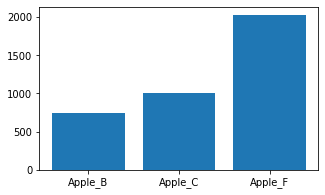

In [70]:
# number of classes
fig = plt.figure(figsize=(5,3))
plt.bar(list_of_apples, df.groupby("apple_class")["apple_class"].count());
print(df.groupby("apple_class")["apple_class"].count())

**Classes distribution** <br>
* Classes distribution suggests that F1 score might be more appropriate than Accuracy

In [69]:
# check if % structure of clasess for test is the same as structure in whole dataset
(np.sum(y_test, axis=0) / y_test.shape[0] *100).round(1)

array([19.6, 26.6, 53.9], dtype=float32)